## Regresión usando scikit-learn
Se usará una base de datos de fútbol europeo.<br>
scikit-learn es una biblioteca de software de aprendizaje automático.

In [3]:
import sqlite3
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import preprocessing

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
import numpy as np

Se crea conexión a la base de datos y se lee la tabla "Player_Attributes"

In [4]:
cnx = sqlite3.connect('european_soccer/database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes",cnx)

In [5]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [6]:
df.shape

(183978, 42)

In [7]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [8]:
#se selccionan solo algunas columnas que se usarán como "features"  o caracteristicas para el modelo de machine learning
features = ['potential','crossing','finishing','heading_accuracy','short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes']
#basado en esas caracteristicas o features se determinará el overall_rating adecuado para cada jugador
#x -> features
#y -> overall_rating

In [10]:
df['overall_rating'].head()

0    67.0
1    67.0
2    62.0
3    61.0
4    61.0
Name: overall_rating, dtype: float64

In [11]:
#Seleccionamos el target
target = ['overall_rating'] #variable dependiente

In [12]:
#Limpiamos datos eliminando filas con valores nan
df = df.dropna()

In [13]:
#separamos las features en X y el target en Y
x = df[features]
y = df[target]

In [14]:
x.iloc[3] #mostramos una fila cualquiera

potential             65.0
crossing              48.0
finishing             43.0
heading_accuracy      70.0
short_passing         60.0
volleys               43.0
dribbling             50.0
curve                 44.0
free_kick_accuracy    38.0
long_passing          63.0
ball_control          48.0
acceleration          60.0
sprint_speed          64.0
agility               59.0
reactions             46.0
balance               65.0
shot_power            54.0
jumping               58.0
stamina               54.0
strength              76.0
long_shots            34.0
aggression            62.0
interceptions         40.0
positioning           44.0
vision                53.0
penalties             47.0
marking               62.0
standing_tackle       63.0
sliding_tackle        66.0
gk_diving              5.0
gk_handling           10.0
gk_kicking             9.0
gk_positioning         7.0
gk_reflexes            7.0
Name: 3, dtype: float64

In [15]:
x.head()

,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [16]:
y.head()

,overall_rating
0,67.0
1,67.0
2,62.0
3,61.0
4,61.0


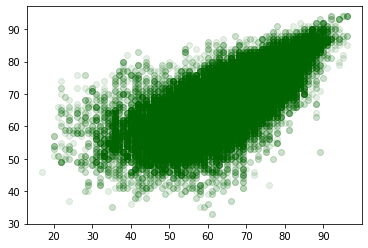

In [17]:
plt.scatter(x['reactions'],y,color="darkgreen",label="Data",alpha=.1) #grafico de dispersión

<h2 style="color:purple">Separamos los datos en Training y Test Datasets</h2>

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=324) 
#33% para los datos de test, el resto es para entrenar la máquina

In [19]:
#utiliza un escalador estandar, avita los sesgos de posibles features que tengan valores demasiados altos
scale = preprocessing.StandardScaler()
scale.fit(x_train)
x_train = scale.transform(x_train)

In [20]:
x_train

array([[ 1.44656849, -1.74342918, -1.30933816, ...,  2.57678815,
         3.78787044,  3.63878633],
       [ 0.53577993, -2.26453801, -2.09625392, ..., -0.30869586,
        -0.06421014, -0.25250618],
       [-0.67860483, -2.43824096, -1.99133182, ...,  1.67803083,
         2.60739414,  2.70952245],
       ...,
       [ 1.75016468,  1.32532283,  1.31371437, ..., -0.63981698,
        -0.31273146, -0.36866417],
       [ 0.08038564,  0.804214  , -0.5224224 , ..., -0.40330189,
        -0.62338312, -0.54290114],
       [ 1.44656849, -1.56972624,  0.52679861, ..., -0.54521094,
        -0.68551345, -0.25250618]])

## Se crea una instancia del modelo "LinearRegression" de ScikitLearn

In [21]:
regressor = LinearRegression()

## Ajustamos el modelo a los datos de entrenamiento

In [22]:
regressor.fit(x_train, y_train) #Acá es donde se buscan los valores adecuados de la ecuación

LinearRegression()

## Se lleva a cabo una predicción utilizando el ser de testeo que se reservo anteriormente

In [23]:
x_test = scale.transform(x_test)
y_prediction = regressor.predict(x_test)
y_result = y_prediction - y_test #se obtiene en cuanto se equivocó la prediccion  con respecto a los valopres de test
y_prediction.shape

(59517, 1)

In [26]:
RMSE = sqrt(mean_squared_error(y_true=y_test, y_pred=y_prediction))
regressor.score(x_test,y_test) #informa la precisión del modelo, en este caso del 84%

0.8412690897596594

In [27]:
print(RMSE) #Error de casi 3 puntos

2.8053030468552116


In [28]:
regressor.coef_ #coeficiente por cada feature, los pesos por lo que se multiplica cada x

array([[ 2.48175418,  0.37435166,  0.2155902 ,  1.14537904,  0.72579619,
         0.08835762, -0.2396529 ,  0.20341906,  0.23070925,  0.08573083,
         2.03147644,  0.08063536,  0.11593773, -0.09744622,  1.92780373,
         0.10753058,  0.27833167,  0.16277628, -0.08089224,  0.73874625,
        -0.25048481,  0.33897633,  0.22293067, -0.18511046, -0.01892236,
         0.21517621,  0.70526674,  0.07880386, -0.61339243,  2.72376613,
         0.51832172, -0.70907673,  0.91420565,  0.43578429]])